# Session 7: Introduction to ML - Classification

## Demo 3: Classification on Customer Churn Dataset

Classification using customer service churn dataset (https://www.kaggle.com/blastchar/telco-customer-churn)

In [1]:
import sklearn
from sklearn import *
sklearn.__version__

'0.21.2'

In [2]:
import pandas #we also need pandas package here to load the csv data

# Load original dataset
customer_data = pd.read_csv('./data/Telco-Customer-Churn.csv')

selected_features = customer_data.columns[:-1].values
X = customer_data[selected_features].values
y = customer_data['Churn'].values
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import pandas as pd
# Load transformed dataset
customer_data = pd.read_csv('./data_telco/Telco-Customer-Churn_dummies.csv')

selected_features = customer_data.columns[:-1].values
X = customer_data[selected_features].values
y = customer_data['Churn_Yes'].values
customer_data.head(5)


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [6]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

### 1. Logistic regression model

In [7]:
# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Logistic Regression: Training accuracy: 0.802
Logistic Regression: Testing accuracy: 0.803


C:\Users\patax\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Decision tree model

In [8]:
# Run decision tree
tree = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree: Training accuracy: 1.000
Decision Tree: Testing accuracy: 0.714


In [11]:
#### 2.1 Explore feature importance and tree

In [12]:
print(selected_features)
print(tree.feature_importances_)

['Unnamed: 0' 'SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges'
 'gender_Male' 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_Yes' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_Yes' 'OnlineBackup_Yes' 'DeviceProtection_Yes'
 'TechSupport_Yes' 'StreamingTV_Yes' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']
[0.17703941 0.01581791 0.20057906 0.13495054 0.13228218 0.01943407
 0.01773952 0.02009831 0.00497487 0.01981748 0.10551961 0.00810279
 0.016962   0.01286758 0.00843322 0.01373656 0.00547001 0.00688048
 0.00851706 0.01280161 0.01513368 0.01473642 0.02236951 0.00573611]


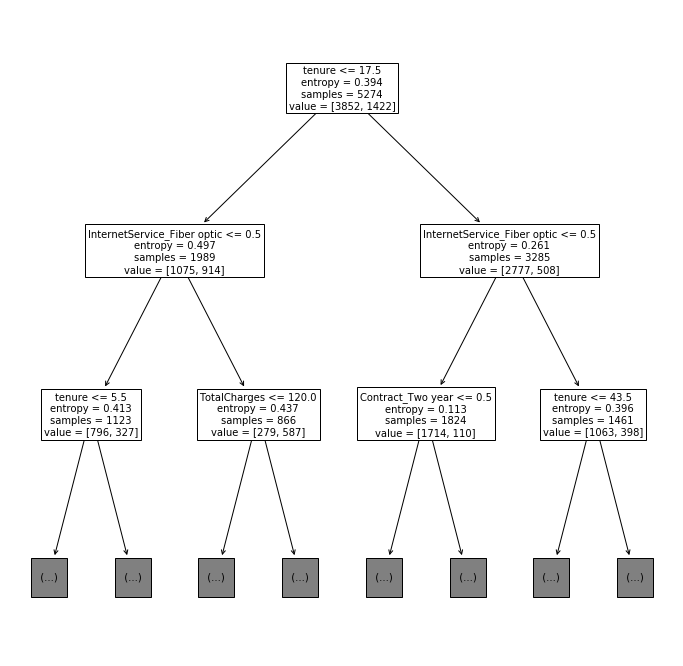

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree, feature_names=selected_features, fontsize=10, max_depth=2)
plt.show()

### 3. Evaluation - calculate precision and recall

Calculate precision and recall for the model recently fitted (either logistic regression or decision tree)

In [19]:
# calculate precision and recall

# y_predict = logreg.predict(X_test) #use this for logistic regression 
y_predict = tree.predict(X_test) #use this for decision tree

print("Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Precision score: 0.440
Recall score: 0.459


Plot precision-recall curve (see https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Text(0.5, 1.0, 'Average precision score: AP=0.63')

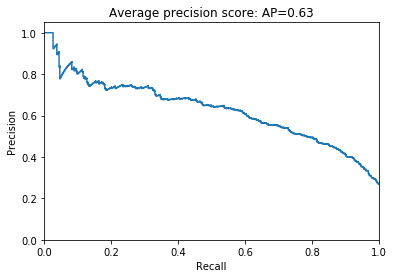

In [20]:
import matplotlib.pyplot as plt

y_prob = logreg.decision_function(X_test) #use this for logistic regression
# y_prob = tree.predict_proba(X_test)[:,1]  #use this for decision tree

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))